In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as mpl
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as tts
from lazypredict.Supervised import LazyRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

In [2]:
safety_train = pd.read_csv('../data/safety_car_es.csv')
safety_test = pd.read_csv('../data/safety_es_test.csv')

# Análisis del dataframe

---

Procedemos a transformar nuestro dataframe según nuestros objetivos, eliminando ciertas columnas y modificando ciertos parámetros

In [3]:
safety_train.shape

(35442, 38)

In [4]:
pd.set_option('display.max_columns', 30)

safety_train.head()

,circuitId,circuitRef,circuit_name,location,country,lat,lng,alt,raceId,year,round,grand_prix,date,time,resultId,...,constructorRef,const_name,const_nat,driver_points,const_points,lap,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,turns,length
0,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,25525,...,ferrari,Ferrari,Italian,104.00,157.00,1,25,1011,20,10,clear,False,False,16,4675
1,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,25525,...,ferrari,Ferrari,Italian,104.00,157.00,2,25,1011,20,10,clear,False,False,16,4675
2,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,25525,...,ferrari,Ferrari,Italian,104.00,157.00,3,25,1011,20,10,clear,False,False,16,4675
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,25525,...,ferrari,Ferrari,Italian,104.00,157.00,4,25,1011,20,10,clear,False,False,16,4675
4,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,1079,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,25525,...,ferrari,Ferrari,Italian,104.00,157.00,5,25,1011,20,10,clear,False,False,16,4675


In [5]:
safety_train = safety_train.drop(columns=['circuitId', 'circuitRef', 'raceId', 'driverId', 'driverRef', 'resultId', 'constructorId', 'constructorRef'], axis=1)

safety_train.head()       # eliminamos las columnas de ID y de referencias ya que no nos aportan información valiosa para nuestro estudio

,circuit_name,location,country,lat,lng,alt,year,round,grand_prix,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,lap,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,turns,length
0,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,1,25,1011,20,10,clear,False,False,16,4675
1,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,2,25,1011,20,10,clear,False,False,16,4675
2,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,3,25,1011,20,10,clear,False,False,16,4675
3,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,4,25,1011,20,10,clear,False,False,16,4675
4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26,109,2022,6,Spanish Grand Prix,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,5,25,1011,20,10,clear,False,False,16,4675


In [6]:
safety_train = safety_train.drop(columns=['circuit_name', 'location', 'country', 'lat', 'lng', 'alt', 'grand_prix', 'turns'], axis=1)

safety_train.head()       # eliminamos estas columnas ya que tienen valores constantes y no aportan gran información

,year,round,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,lap,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,length
0,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,1,25,1011,20,10,clear,False,False,4675
1,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,2,25,1011,20,10,clear,False,False,4675
2,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,3,25,1011,20,10,clear,False,False,4675
3,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,4,25,1011,20,10,clear,False,False,4675
4,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,5,25,1011,20,10,clear,False,False,4675


In [7]:
safety_test.head()

,year,round,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,lap,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,length
0,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,1,22,1015,15,10,clear,False,NaN,4655
1,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,2,22,1015,15,10,clear,False,NaN,4655
2,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,3,22,1015,15,10,clear,False,NaN,4655
3,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,4,22,1015,15,10,clear,False,NaN,4655
4,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,5,22,1015,15,10,clear,False,NaN,4655


In [8]:
safety_train.shape

(35442, 22)

In [9]:
safety_test.shape

(1320, 22)

# Correlación

---

Procedemos a averiguar que grado de correlación tienen entre sí las columnas y evaluamos si podemos desprendernos de algunas columnas o no

In [10]:
numeric_columns = safety_train.select_dtypes(include=np.number)

numeric_columns.columns

Index(['year', 'round', 'grid_position', 'driver_points', 'const_points',
       'lap', 'temperature', 'atm_pressure', 'wind', 'visibility', 'length'],
      dtype='object')

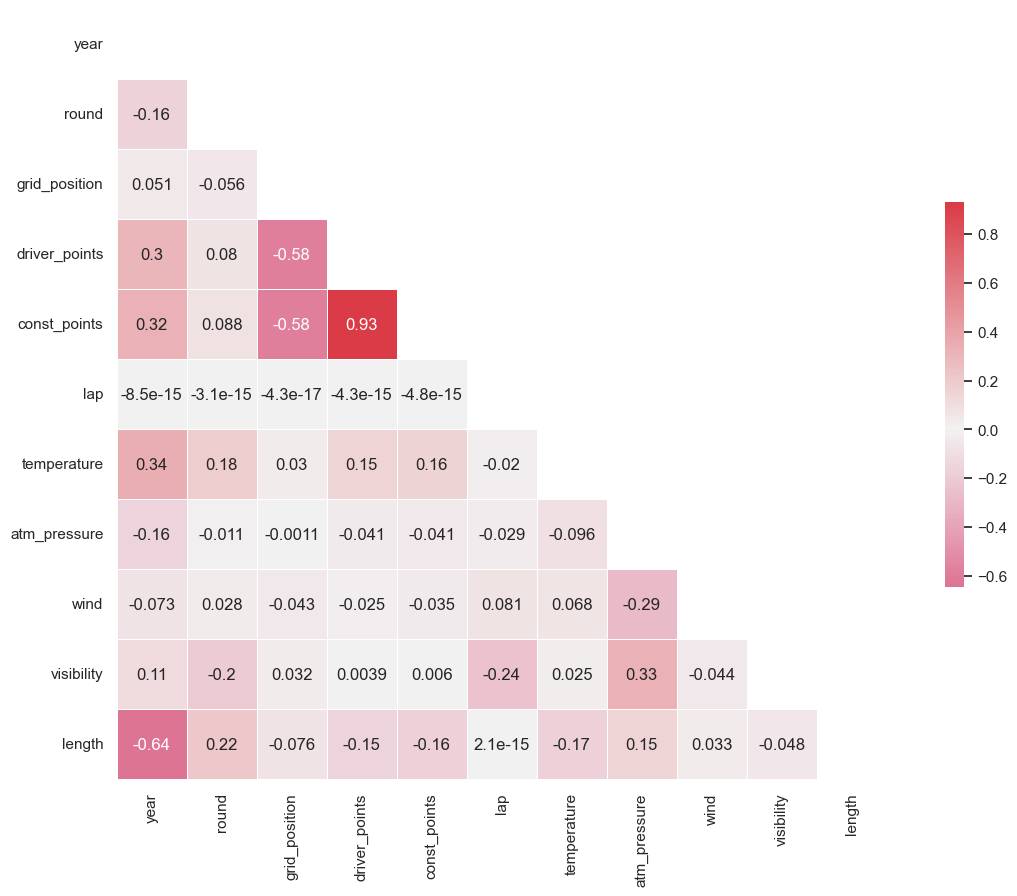

In [11]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(numeric_columns.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

### Eliminación

---

La variable 'lap' muestra correlaciones extremadamente cercanas a cero (muy cerca de 0) con las variables 'year', 'round', 'grid_position', 'driver_points', 'constructor_points' y 'length'. Esto indica que no hay correlación lineal apreciable entre estas variables y la variable 'lap'. En otras palabras, estas variables numéricas no están relacionadas de manera lineal con el número de vueltas ('lap'). Por ende, tomamos la decisión de eliminarla.

In [12]:
safety_train = safety_train.drop(columns='lap', axis=1)

safety_train.head()

,year,round,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,length
0,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675
1,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675
2,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675
3,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675
4,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675


In [13]:
safety_test = safety_test.drop(columns='lap', axis=1)

safety_test.head()

,year,round,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,length
0,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,22,1015,15,10,clear,False,NaN,4655
1,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,22,1015,15,10,clear,False,NaN,4655
2,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,22,1015,15,10,clear,False,NaN,4655
3,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,22,1015,15,10,clear,False,NaN,4655
4,2023,8,2023-06-04,15:00:00,1,Max,Verstappen,1997-09-30,Dutch,Red Bull,Austrian,144.00,249.00,22,1015,15,10,clear,False,NaN,4655


In [14]:
safety_train.shape

(35442, 21)

In [15]:
duplicates_train = safety_train[safety_train.duplicated()]      # eliminar la columna 'lap' nos genera muchas filas duplicadas, por lo tanto,
                                                                # procedemos a desprendernos de ellas
duplicates_train.shape

(33344, 21)

In [16]:
safety_train = safety_train.drop_duplicates()

safety_train.shape

(2098, 21)

In [17]:
safety_test.shape

(1320, 21)

In [18]:
duplicates_test = safety_test[safety_test.duplicated()]     # eliminar la columna 'lap' nos genera muchas filas duplicadas, por lo tanto,
                                                            # procedemos a desprendernos de ellas

duplicates_test.shape

(1260, 21)

In [19]:
safety_test = safety_test.drop_duplicates()

safety_test.shape

(60, 21)

### Concatenación

---

Una vez hemos terminado de modificar las filas de ambos dataframes, procedemos a concatenar train y test para modificar al mismo tiempo los dos dataframes

In [20]:
safety = pd.concat([safety_train, safety_test], ignore_index = True)

safety.head()

,year,round,date,time,grid_position,forename,surname,dob,driver_nat,const_name,const_nat,driver_points,const_points,temperature,atm_pressure,wind,visibility,cloudiness,rainfall,safety_car,length
0,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1011,20,10,clear,False,False,4675
1,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1010,22,10,clear,False,False,4675
2,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,25,1010,20,10,clear,False,False,4675
3,2022,6,2022-05-22,13:00:00,1,Charles,Leclerc,1997-10-16,Monegasque,Ferrari,Italian,104.00,157.00,24,1010,19,10,clear,False,False,4675
4,2022,6,2022-05-22,13:00:00,13,Yuki,Tsunoda,2000-05-11,Japanese,AlphaTauri,Italian,10.00,16.00,25,1011,20,10,clear,False,False,4675


In [21]:
safety.shape

(2158, 21)

In [22]:
safety.isna().sum()     # aquí observamos los nulos que queremos predecir

year              0
round             0
date              0
time              0
grid_position     0
forename          0
surname           0
dob               0
driver_nat        0
const_name        0
const_nat         0
driver_points     0
const_points      0
temperature       0
atm_pressure      0
wind              0
visibility        0
cloudiness        0
rainfall          0
safety_car       60
length            0
dtype: int64

In [23]:
safety.dtypes

year               int64
round              int64
date              object
time              object
grid_position      int64
forename          object
surname           object
dob               object
driver_nat        object
const_name        object
const_nat         object
driver_points    float64
const_points     float64
temperature        int64
atm_pressure       int64
wind               int64
visibility         int64
cloudiness        object
rainfall            bool
safety_car        object
length             int64
dtype: object

# Análisis numérico

---

Continuamos descubriendo las correlaciones de nuestras variables numéricas aplicando la correlación de Spearman, para determinar cuales de nuestras distintas variables numéricas tienen una relación significativa con respecto a la columna objetivo binaria

In [24]:
numeric_columns = safety_train.select_dtypes(include=np.number)

numeric_columns.columns

Index(['year', 'round', 'grid_position', 'driver_points', 'const_points',
       'temperature', 'atm_pressure', 'wind', 'visibility', 'length'],
      dtype='object')

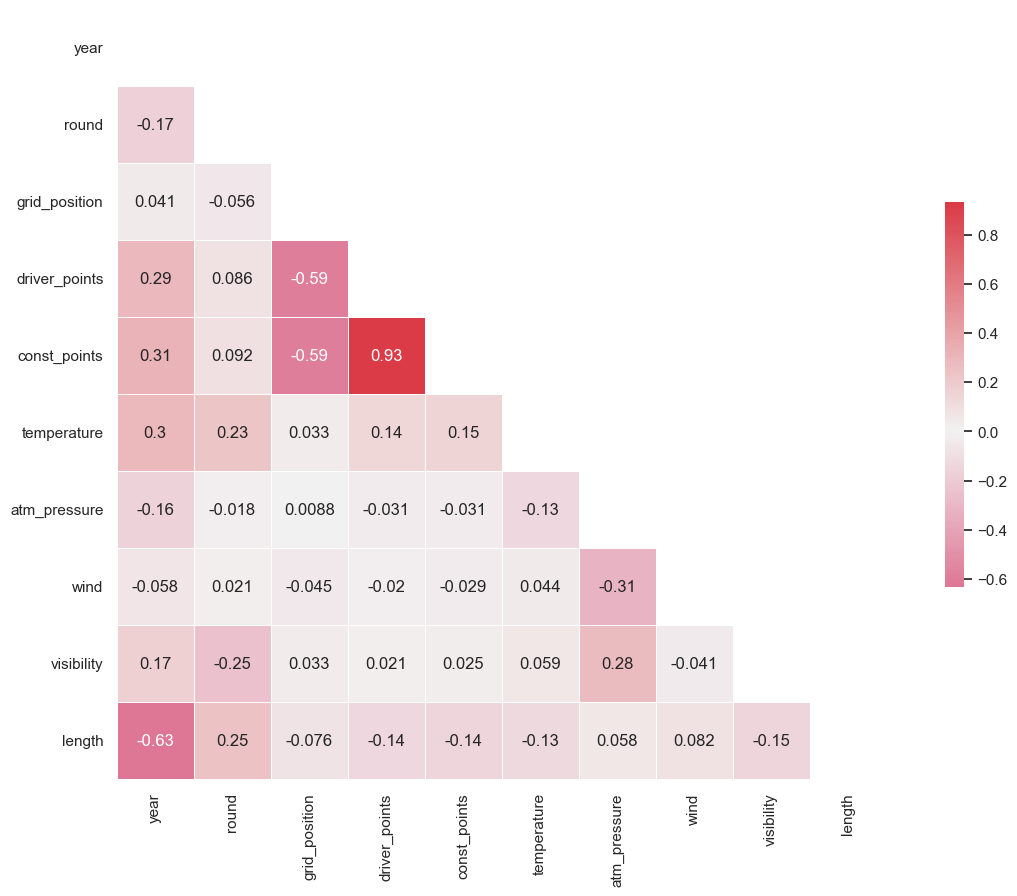

In [25]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(numeric_columns.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [26]:
numeric_columns = safety.select_dtypes(include=np.number)
numeric_columns['safety_car'] = safety['safety_car'].fillna(safety['safety_car'].mean())        # rellenamos los valores nulos con la media

results_spearman = []

for column in numeric_columns:
    corr, p_value = spearmanr(numeric_columns[column], numeric_columns['safety_car'])
    results_spearman.append((column, corr, p_value))

for result in results_spearman:
    print("Columna:", result[0])
    print("Coeficiente de correlación de Spearman:", result[1])
    print("Valor p:", result[2])
    print("\n")

Columna: year
Coeficiente de correlación de Spearman: 0.28756593580581785
Valor p: 2.3141017075440552e-42


Columna: round
Coeficiente de correlación de Spearman: 0.03962307511972723
Valor p: 0.06572162591865999


Columna: grid_position
Coeficiente de correlación de Spearman: -0.012990625759839199
Valor p: 0.5464116010093973


Columna: driver_points
Coeficiente de correlación de Spearman: 0.048114113378710896
Valor p: 0.025410397580661714


Columna: const_points
Coeficiente de correlación de Spearman: 0.051585559123383466
Valor p: 0.01654900886967427


Columna: temperature
Coeficiente de correlación de Spearman: -0.14977796383244169
Valor p: 2.685365847415642e-12


Columna: atm_pressure
Coeficiente de correlación de Spearman: -0.0022867478925614813
Valor p: 0.9154492074035852


Columna: wind
Coeficiente de correlación de Spearman: -0.12847592220798262
Valor p: 2.103116574104138e-09


Columna: visibility
Coeficiente de correlación de Spearman: -0.016760571229039203
Valor p: 0.4364488841

### Conclusiones

---

- **Columna 'year':**
  - Coeficiente de correlación de Spearman: 0.288
  - Valor p: 2.31e-42
  - Conclusión: Existe una correlación positiva significativa entre el año y la presencia del coche de seguridad ('safety_car'). A medida que el año aumenta, la probabilidad de que aparezca el coche de seguridad también tiende a aumentar.
<br><br>

- **Columna 'round':**
  - Coeficiente de correlación de Spearman: 0.040
  - Valor p: 0.066
  - Conclusión: Existe una correlación positiva, pero no significativa, entre la ronda ('round') y la presencia del coche de seguridad. Aunque hay una tendencia positiva, no podemos concluir que sea estadísticamente significativa.
<br><br>

- **Columna 'grid_position':**
  - Coeficiente de correlación de Spearman: -0.013
  - Valor p: 0.546
  - Conclusión: No hay una correlación significativa entre la posición en la parrilla ('grid_position') y la presencia del coche de seguridad.
<br><br>

- **Columna 'driver_points':**
  - Coeficiente de correlación de Spearman: 0.048
  - Valor p: 0.025
  - Conclusión: Existe una correlación positiva significativa, aunque leve, entre los puntos del conductor ('driver_points') y la presencia del coche de seguridad. A medida que los puntos del conductor aumentan, la probabilidad de que aparezca el coche de seguridad tiende a aumentar. Además posee una alta correlación con los puntos del constructor ('const_points').
<br><br>

- **Columna 'const_points':**
  - Coeficiente de correlación de Spearman: 0.052
  - Valor p: 0.0165
  - Conclusión: Existe una correlación positiva significativa, aunque leve, entre los puntos del constructor ('const_points') y la presencia del coche de seguridad. Además posee una alta correlación con los puntos del conductor ('driver_points').
<br><br>

- **Columna 'temperature':**
  - Coeficiente de correlación de Spearman: -0.150
  - Valor p: 2.69e-12
  - Conclusión: Existe una correlación negativa significativa entre la temperatura y la presencia del coche de seguridad. A medida que la temperatura aumenta, es menos probable que ocurra un incidente que requiera la intervención del coche de seguridad en eventos de carreras.
<br><br>

- **Columna 'atm_pressure':**
  - Coeficiente de correlación de Spearman: -0.0023
  - Valor p: 0.915
  - Conclusión: No hay una correlación significativa entre la presión atmosférica ('atm_pressure') y la presencia del coche de seguridad.
<br><br>

- **Columna 'wind':**
  - Coeficiente de correlación de Spearman: -0.128
  - Valor p: 2.10e-09
  - Conclusión: Existe una correlación negativa significativa entre la velocidad del viento ('wind') y la presencia del coche de seguridad. Vientos más fuertes están asociados con una disminución en la probabilidad de que ocurran incidentes en la pista que requieran la intervención del coche de seguridad.
<br><br>

- **Columna 'visibility':**
  - Coeficiente de correlación de Spearman: -0.0168
  - Valor p: 0.436
  - Conclusión: No hay una correlación significativa entre la visibilidad y la presencia del coche de seguridad.
<br><br>

- **Columna 'length':**
  - Coeficiente de correlación de Spearman: -0.103
  - Valor p: 1.54e-06
  - Conclusión: Existe una correlación negativa significativa, aunque leve, entre una variable no identificada ('length') y la presencia del coche de seguridad. Aunque no conocemos la naturaleza exacta de esta variable, su correlación sugiere que está relacionada de alguna manera con la ocurrencia de incidentes en la pista.
<br><br>

- **Columna 'safety_car':**
  - Coeficiente de correlación de Spearman: 1.0
  - Valor p: 0.0
  - Conclusión: Existe una correlación perfecta (positiva) entre la variable binaria 'safety_car' y sí misma. Esto es esperado ya que representa la presencia o ausencia del coche de seguridad y, por lo tanto, está altamente correlacionada consigo misma.


### Decisiones

---

Una vez hecho nuestro estudio sobre las variable numéricas, procedemos a tomar nuestras decisiones

In [27]:
safety = safety.drop(columns='round', axis=1)       # correlación positiva no significativa
safety = safety.drop(columns='grid_position', axis=1)       # no hay correlación significativa
safety = safety.drop(columns='driver_points', axis=1)       # alta correlación con 'const_points' pero menor correlación de Spearman que 'const_points'
safety = safety.drop(columns='atm_pressure', axis=1)        # no hay correlación significativa
safety = safety.drop(columns='visibility', axis=1)       # no hay correlación significativa

In [28]:
numeric_columns = safety.select_dtypes(include=np.number)

numeric_columns.columns

Index(['year', 'const_points', 'temperature', 'wind', 'length'], dtype='object')

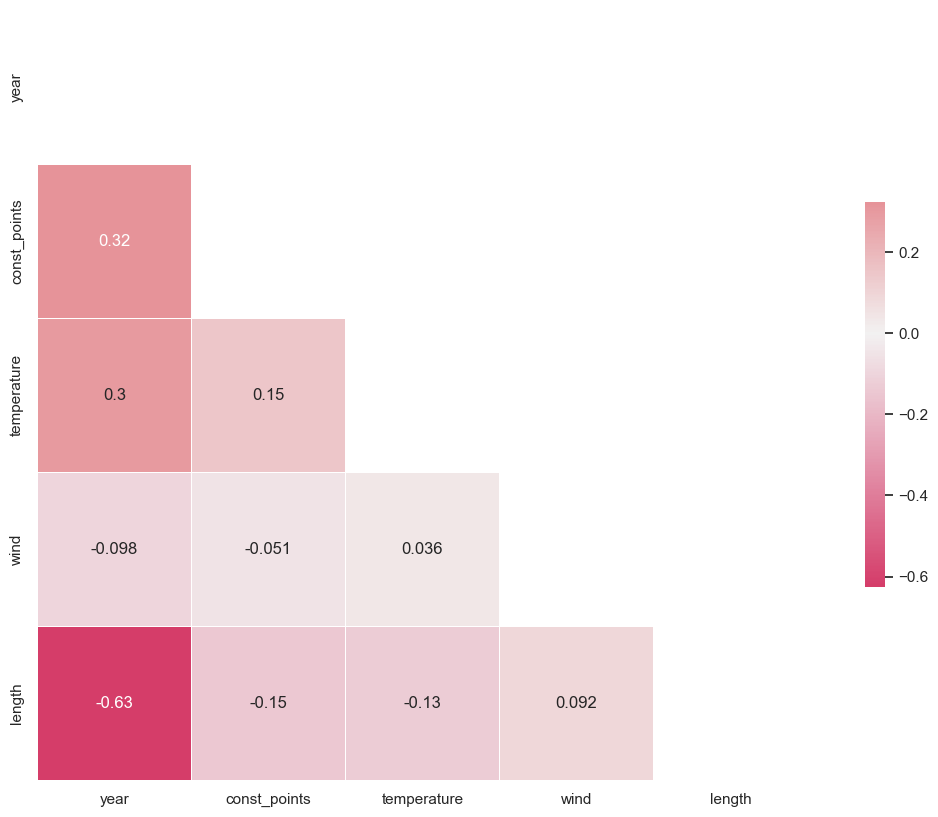

In [29]:
plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(numeric_columns.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

# Análisis categórico

---

Procedemos a realizar una prueba de Chi-cuadrado (Chi-Square Test) para determinar cuales de nuestras distintas variables categóricas tienen una relación significativa con respecto a la columna objetivo binaria

In [30]:
object_columns = safety.select_dtypes(include=['object'])

object_columns.columns

Index(['date', 'time', 'forename', 'surname', 'dob', 'driver_nat',
       'const_name', 'const_nat', 'cloudiness', 'safety_car'],
      dtype='object')

In [31]:
categorical_columns = safety.select_dtypes(include=['object']).columns

results = []

for column in categorical_columns:
    contingency_table = pd.crosstab(safety[column], safety['safety_car'])       # elaboraramos una tabla de contingencia para cada columna
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)     # aplicamos la prueba de chi-cuadrado
    degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)        # grados de libertad ((filas - 1) * (columnas -1))
    alpha = 0.05        # nivel de significancia
    critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)      # establecemos el valor crítico dependiendo de cada valor de significancia y 
                                                                        # grado de libertad de cada columna
    
    results.append((column, chi2, p_value, degrees_of_freedom, critical_value))

for result in results:
    print("Columna:", result[0])
    print("Estadístico de prueba chi-cuadrado:", result[1])
    print("Valor p:", result[2])
    print("Grados de libertad:", result[3])
    print("Valor crítico de chi-cuadrado:", result[4])
    
    if result[1] > result[4]:
        print("Se rechaza la hipótesis nula. Hay una asociación significativa.")        # comparamos el estadístico de prueba con el valor crítico y 
                                                                                        # determinamos si se rechaza la hipótesis nula
    else:
        print("No se rechaza la hipótesis nula. No hay evidencia significativa de asociación.")
    
    print("\n")

Columna: date
Estadístico de prueba chi-cuadrado: 449.86947855135946
Valor p: 7.587899956665305e-79
Grados de libertad: 26
Valor crítico de chi-cuadrado: 38.885138659830055
Se rechaza la hipótesis nula. Hay una asociación significativa.


Columna: time
Estadístico de prueba chi-cuadrado: 150.21060166928737
Valor p: 2.3732065846614064e-32
Grados de libertad: 3
Valor crítico de chi-cuadrado: 7.814727903251179
Se rechaza la hipótesis nula. Hay una asociación significativa.


Columna: forename
Estadístico de prueba chi-cuadrado: 93.72313880777443
Valor p: 0.4886531394036131
Grados de libertad: 94
Valor crítico de chi-cuadrado: 117.63165114234555
No se rechaza la hipótesis nula. No hay evidencia significativa de asociación.


Columna: surname
Estadístico de prueba chi-cuadrado: 98.81707617065962
Valor p: 0.48627901391777506
Grados de libertad: 99
Valor crítico de chi-cuadrado: 123.2252214533618
No se rechaza la hipótesis nula. No hay evidencia significativa de asociación.


Columna: dob
Est

### Conclusiones

---

- **Columna 'date':**
  - Estadístico de prueba chi-cuadrado: 449.87
  - Valor p: 7.59e-79
  - Grados de libertad: 26
  - Valor crítico de chi-cuadrado: 38.89
  - Conclusión: Se rechaza la hipótesis nula. Hay una asociación significativa entre la columna 'date' y la presencia del coche de seguridad. Esto indica que la fecha está relacionada de manera significativa con la probabilidad de que aparezca el coche de seguridad.
<br><br>

- **Columna 'time':**
  - Estadístico de prueba chi-cuadrado: 150.21
  - Valor p: 2.37e-32
  - Grados de libertad: 3
  - Valor crítico de chi-cuadrado: 7.81
  - Conclusión: Se rechaza la hipótesis nula. Hay una asociación significativa entre la columna 'time' y la presencia del coche de seguridad. Esto sugiere que el tiempo está relacionado de manera significativa con la probabilidad de que aparezca el coche de seguridad.
<br><br>

- **Columna 'forename':**
  - Estadístico de prueba chi-cuadrado: 93.72
  - Valor p: 0.49
  - Grados de libertad: 94
  - Valor crítico de chi-cuadrado: 117.63
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'forename' (nombre) y la presencia del coche de seguridad. Esto sugiere que el nombre del conductor no está relacionado de manera significativa con la probabilidad de que aparezca el coche de seguridad.
<br><br>

- **Columna 'surname':**
  - Estadístico de prueba chi-cuadrado: 98.82
  - Valor p: 0.49
  - Grados de libertad: 99
  - Valor crítico de chi-cuadrado: 123.23
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'surname' (apellido) y la presencia del coche de seguridad.
<br><br>

- **Columna 'dob':**
  - Estadístico de prueba chi-cuadrado: 103.25
  - Valor p: 0.47
  - Grados de libertad: 103
  - Valor crítico de chi-cuadrado: 127.69
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'dob' (fecha de nacimiento) y la presencia del coche de seguridad.
<br><br>

- **Columna 'driver_nat':**
  - Estadístico de prueba chi-cuadrado: 25.64
  - Valor p: 0.64
  - Grados de libertad: 29
  - Valor crítico de chi-cuadrado: 42.56
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'driver_nat' (nacionalidad del conductor) y la presencia del coche de seguridad.
<br><br>

- **Columna 'const_name':**
  - Estadístico de prueba chi-cuadrado: 62.10
  - Valor p: 0.01
  - Grados de libertad: 39
  - Valor crítico de chi-cuadrado: 54.57
  - Conclusión: Se rechaza la hipótesis nula. Hay una asociación significativa entre la columna 'const_name' (nombre del constructor) y la presencia del coche de seguridad. Esto indica que el nombre del constructor está relacionado de manera significativa con la probabilidad de que aparezca el coche de seguridad.
<br><br>

- **Columna 'const_nat':**
  - Estadístico de prueba chi-cuadrado: 19.93
  - Valor p: 0.10
  - Grados de libertad: 13
  - Valor crítico de chi-cuadrado: 22.36
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'const_nat' (nacionalidad del constructor) y la presencia del coche de seguridad.
<br><br>

- **Columna 'cloudiness':**
  - Estadístico de prueba chi-cuadrado: 0.5497
  - Valor p: 0.4585
  - Grados de libertad: 1
  - Valor crítico de chi-cuadrado: 3.8415
  - Conclusión: No se rechaza la hipótesis nula. No hay evidencia significativa de asociación entre la columna 'cloudiness' y la presencia del coche de seguridad ('safety_car'). Esto sugiere que la cantidad de nubosidad no parece estar relacionada de manera significativa con la presencia del coche de seguridad en los eventos de carreras.
<br><br>

- **Columna 'safety_car':**
  - Estadístico de prueba chi-cuadrado: 2079.7813
  - Valor p: 0.0
  - Grados de libertad: 1
  - Valor crítico de chi-cuadrado: 3.8415
  - Conclusión: Se rechaza la hipótesis nula. Hay una asociación significativa entre la columna 'safety_car' y sí misma, lo cual es esperado ya que representa la presencia o ausencia del coche de seguridad y, por lo tanto, está altamente correlacionada consigo misma.

### Decisiones

---

Una vez hecho nuestro estudio sobre las variable numéricas, procedemos a tomar nuestras decisiones

In [32]:
safety = safety.drop(columns='forename', axis=1)
safety = safety.drop(columns='surname', axis=1)
safety = safety.drop(columns='dob', axis=1)
safety = safety.drop(columns='driver_nat', axis=1)      # no hay evidencia significativa de asociación en niguna de estas variables
safety = safety.drop(columns='const_nat', axis=1)
safety = safety.drop(columns='cloudiness', axis=1)

In [33]:
object_columns = safety.select_dtypes(include=['object'])

object_columns.columns

Index(['date', 'time', 'const_name', 'safety_car'], dtype='object')

# Análisis binario

---

Procedemos a realizar una prueba de Chi-cuadrado (Chi-Square Test) para determinar si nuestra variable binaria tiene una relación significativa con respecto a la columna objetivo binaria

In [34]:
contingency_table = pd.crosstab(safety['rainfall'], safety['safety_car'])       # elaboraramos una tabla de contingencia para cada columna
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)     # aplicamos la prueba de chi-cuadrado
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)        # grados de libertad ((filas - 1) * (columnas -1))
alpha = 0.05        # nivel de significancia
critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)      # establecemos el valor crítico dependiendo de cada valor de significancia y 
                                                                    # grado de libertad de cada columna

print("Estadístico de prueba chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", degrees_of_freedom)
print("Valor crítico de chi-cuadrado:", critical_value)

if chi2 > critical_value:
    print("Se rechaza la hipótesis nula. Hay una asociación significativa.")        # comparamos el estadístico de prueba con el valor crítico y 
                                                                                    # determinamos si se rechaza la hipótesis nula
else:
    print("No se rechaza la hipótesis nula. No hay evidencia significativa de asociación.")

Estadístico de prueba chi-cuadrado: 11.988797819158243
Valor p: 0.0005352130552138286
Grados de libertad: 1
Valor crítico de chi-cuadrado: 3.841458820694124
Se rechaza la hipótesis nula. Hay una asociación significativa.


### Conclusiones

---

- **Columna 'date':**

  - Estadístico de prueba chi-cuadrado: 11.99
  - Valor p: 0.0005
  - Grados de libertad: 1
  - Valor crítico de chi-cuadrado: 3.84
  - Conclusión: Se rechaza la hipótesis nula. Hay una asociación significativa entre la columna 'rainfall' y la presencia del coche de seguridad. Esto indica que la lluvia está relacionada de manera significativa con la probabilidad de que aparezca el coche de seguridad.

# One-hot encoding

---

Procedemos a realizar el one-hot encoding para convertir las variables categóricas en variables numéricas

In [35]:
safety.shape

(2158, 10)

In [36]:
safety.head()

,year,date,time,const_name,const_points,temperature,wind,rainfall,safety_car,length
0,2022,2022-05-22,13:00:00,Ferrari,157.00,25,20,False,False,4675
1,2022,2022-05-22,13:00:00,Ferrari,157.00,25,22,False,False,4675
2,2022,2022-05-22,13:00:00,Ferrari,157.00,25,20,False,False,4675
3,2022,2022-05-22,13:00:00,Ferrari,157.00,24,19,False,False,4675
4,2022,2022-05-22,13:00:00,AlphaTauri,16.00,25,20,False,False,4675


In [37]:
safety.dtypes

year              int64
date             object
time             object
const_name       object
const_points    float64
temperature       int64
wind              int64
rainfall           bool
safety_car       object
length            int64
dtype: object

In [38]:
columns_to_encode = ['date', 'time', 'const_name']

encoded_data = pd.get_dummies(safety, columns = columns_to_encode)

encoded_data.head()

,year,const_points,temperature,wind,rainfall,safety_car,length,date_1996-06-02,date_1997-05-25,date_1998-05-10,date_1999-05-30,date_2000-05-07,date_2001-04-29,date_2002-04-28,date_2003-05-04,...,const_name_Mercedes,const_name_Minardi,const_name_Prost,const_name_Racing Point,const_name_Red Bull,const_name_Renault,const_name_Sauber,const_name_Spyker,const_name_Stewart,const_name_Super Aguri,const_name_Toro Rosso,const_name_Toyota,const_name_Tyrrell,const_name_Virgin,const_name_Williams
0,2022,157.00,25,20,False,False,4675,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2022,157.00,25,22,False,False,4675,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2022,157.00,25,20,False,False,4675,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2022,157.00,24,19,False,False,4675,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2022,16.00,25,20,False,False,4675,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
encoded_data.shape

(2158, 80)

In [40]:
train_clean = encoded_data.iloc[:2098, :]        # separamos el test del train
test_clean = encoded_data.iloc[2098:, :]

train_clean.shape, test_clean.shape

((2098, 80), (60, 80))

In [41]:
y = train_clean['safety_car']        # seleccionamos la columna objetivo
X = train_clean.drop('safety_car', axis = 1)

In [42]:
y.shape, X.shape

((2098,), (2098, 79))

# Aplicación

---

Ahora vamos a realizar el aprendizaje automático utilizando nuestro dataframe como base

In [43]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size = 0.8, 
                                       test_size = 0.2,
                                       random_state = 42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1678, 79), (420, 79), (1678,), (420,))

In [44]:
model_lazy = LazyRegressor()

model_lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 17.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 1678, number of used features: 5
[LightGBM] [Info] Start training from score 0.057807
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                         
 GradientBoostingRegressor                    0.10       0.27  0.20        0.14
 MLPRegressor                                 0.01       0.19  0.21        0.22
 LGBMRegressor                               -0.00       0.19  0.21        0.06
 HistGradientBoostingRegressor               -0.00       0.19  0.21        0.41
 AdaBoostRegressor                           -0.04       0.16  0.22        0.02
 KNeighborsRegressor                         -0.10       0.11  0.22        0.01
 SGDRegressor                                -0.12       0.09  0.23        0.01
 LassoLarsIC                                 -0.12       0.09  0.23        0.01
 LassoCV                                     -0.12       0.09  0.23        0.14
 ElasticNetCV                                -0.12       0.09  0.23        0.09
 BayesianRidge                          

# Entrenamiento

---

Procedemos a entrenar los modelos que menos errores tuvieron con nuestros datos

In [45]:
test_clean.shape

(60, 80)

In [46]:
test_clean.safety_car.isna().sum()

60

In [47]:
test_clean.drop(columns = 'safety_car' , inplace = True)

In [48]:
test_clean.head()

,year,const_points,temperature,wind,rainfall,length,date_1996-06-02,date_1997-05-25,date_1998-05-10,date_1999-05-30,date_2000-05-07,date_2001-04-29,date_2002-04-28,date_2003-05-04,date_2004-05-09,...,const_name_Mercedes,const_name_Minardi,const_name_Prost,const_name_Racing Point,const_name_Red Bull,const_name_Renault,const_name_Sauber,const_name_Spyker,const_name_Stewart,const_name_Super Aguri,const_name_Toro Rosso,const_name_Toyota,const_name_Tyrrell,const_name_Virgin,const_name_Williams
2098,2023,249.00,22,15,False,4655,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2099,2023,249.00,21,12,False,4655,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2100,2023,249.00,22,15,False,4655,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2101,2023,90.00,22,15,False,4655,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2102,2023,90.00,21,12,False,4655,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
model_gbr = GradientBoostingRegressor()

In [50]:
model_gbr.fit(X, y)

GradientBoostingRegressor()

In [51]:
pred1 = model_gbr.predict(test_clean)

In [52]:
model_mlp = MLPRegressor()

In [53]:
model_mlp.fit(X_train, y_train)

MLPRegressor()

In [54]:
pred2 = model_mlp.predict(test_clean)

In [55]:
model_hgbr = HistGradientBoostingRegressor()

In [56]:
model_hgbr.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [57]:
pred3 = model_hgbr.predict(test_clean)

# Muestras

---

Vamos a ejecutar nuestras pruebas utilizando los modelos que tuvieron menos errores

In [58]:
muestra1 = pd.read_csv('../data/safety_es_2023_test.csv')

In [59]:
muestra1['safety_car'] = pred1

In [60]:
umbral = 0.5        # establecemos un umbral predeterminado para la mayoría de los modelos de clasificación binaria de 0.5
muestra1['safety_car'] = muestra1['safety_car'].apply(lambda x: x > umbral)

muestra1.head()

,year,date,time,const_name,const_points,temperature,wind,visibility,rainfall,safety_car,length
0,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
1,2023,2023-06-04,15:00:00,Red Bull,249.00,21,12,10,False,False,4655
2,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
3,2023,2023-06-04,15:00:00,Ferrari,90.00,22,15,10,False,False,4655
4,2023,2023-06-04,15:00:00,Ferrari,90.00,21,12,10,False,False,4655


In [61]:
muestra1.to_csv('first_prediction', index = False)

In [62]:
muestra2 = pd.read_csv('../data/safety_es_2023_test.csv')

In [63]:
muestra2['safety_car'] = pred2

In [64]:
muestra2['safety_car'] = muestra2['safety_car'].apply(lambda x: x > umbral)

muestra2.head()

,year,date,time,const_name,const_points,temperature,wind,visibility,rainfall,safety_car,length
0,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
1,2023,2023-06-04,15:00:00,Red Bull,249.00,21,12,10,False,False,4655
2,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
3,2023,2023-06-04,15:00:00,Ferrari,90.00,22,15,10,False,False,4655
4,2023,2023-06-04,15:00:00,Ferrari,90.00,21,12,10,False,False,4655


In [65]:
muestra2.to_csv('second_prediction', index = False)

In [66]:
muestra3 = pd.read_csv('../data/safety_es_2023_test.csv')

In [67]:
muestra3['safety_car'] = pred3

In [68]:
muestra3['safety_car'] = muestra3['safety_car'].apply(lambda x: x > umbral)

muestra3.head()

,year,date,time,const_name,const_points,temperature,wind,visibility,rainfall,safety_car,length
0,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
1,2023,2023-06-04,15:00:00,Red Bull,249.00,21,12,10,False,False,4655
2,2023,2023-06-04,15:00:00,Red Bull,249.00,22,15,10,False,False,4655
3,2023,2023-06-04,15:00:00,Ferrari,90.00,22,15,10,False,False,4655
4,2023,2023-06-04,15:00:00,Ferrari,90.00,21,12,10,False,False,4655


In [69]:
muestra3.to_csv('third_prediction', index = False)